# Lyrics Cleaning 

In [11]:
import pandas as pd 
import numpy as np
import os
import re
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from pprint import pprint
import glob
import pickle
import time
import datetime
import seaborn as sns
import nltk
from textblob import TextBlob
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
sns.set_style('darkgrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [114]:
pd.set_option("max_colwidth", 50)

In [4]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#opening pickled dataframe
with open("lyrics_all.pkl", "rb") as f:
    df_all = pickle.load(f)

In [113]:
df_all.isnull().sum()

position        0
Song Title      0
Artist          0
Year            0
Lyrics        430
dtype: int64

In [115]:
df_cleaned = df_all.dropna()

In [116]:
df_cleaned.reset_index(inplace=True)
del df_cleaned['index']

In [117]:
#df_cleaned.Year.value_counts()

In [118]:
df_cleaned['Lyrics'] = df_cleaned.Lyrics.astype('str')

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
df_cleaned.dtypes

position      float64
Song Title     object
Artist         object
Year            int64
Lyrics         object
dtype: object

In [120]:
#Create decade column 
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2016]
df_cleaned['Decade'] = pd.cut(df_cleaned.Year, bins, right=False)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Regex Cleaning

In [121]:
df_cleaned.Lyrics.replace(r'b"|b\'', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\\n', ' ', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\n', ' ', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\\', '' , regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'SPOKEN: ', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\[.*?\]', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\{.*?\}', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'(Spoken)', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'(Chorus:.*?)|Chorus:|(Laughs)|()|(Intro:.*?)|(Verse.*?)|Verse 1|(Words and.*?)', 
                          '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'( Frankie Laine)|(Verse 1:.*?)', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\(\)', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\(Verse.*?\)', '', regex=True, inplace=True)
df_cleaned.Lyrics.replace(r'\(Chorus\)', '', regex=True, inplace=True)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# NLTK Analysis 

# TextBlob

In [122]:
#df_cleaned

In [123]:
df_cleaned.shape

(5750, 6)

In [124]:
jm_songs = df_cleaned[df_cleaned.Artist == "John Mayer"]
noSuchThing = jm_songs.Lyrics[4469]
noSuchThing

'   "Welcome to the real world", she said to me Condescendingly Take a seat Take your life Plot it out in black and white Well I never lived the dreams of the prom kings And the drama queens I\'d like to think the best of me Is still hiding Up my sleeve  They love to tell you Stay inside the lines But something\'s better On the other side   I want to run through the halls of my high school I want to scream at the Top of my lungs I just found out there\'s no such thing as the real world Just a lie you\'ve got to rise above   So the good boys and girls take the so called right track Faded white hats Grabbing credits and Maybe transfers They read all the books but they can\'t find the answers And all of our parents They\'re getting older I wonder if they\'ve wished for anything better While in their memories Tiny tragedies  They love to tell you Stay inside the lines But something\'s better On the other side   I want to run through the halls of my high school I want to scream at the Top o

In [125]:
noSuchThing_blob = TextBlob(noSuchThing)

## Stemming and Lemming

In [8]:
lemma=nltk.stem.WordNetLemmatizer()
# for word in noSuchThing_blob.words:
#     print(lemma.lemmatize(word))

# Bag of Words - Count Vectorizer

In [128]:
[noSuchThing]

['   "Welcome to the real world", she said to me Condescendingly Take a seat Take your life Plot it out in black and white Well I never lived the dreams of the prom kings And the drama queens I\'d like to think the best of me Is still hiding Up my sleeve  They love to tell you Stay inside the lines But something\'s better On the other side   I want to run through the halls of my high school I want to scream at the Top of my lungs I just found out there\'s no such thing as the real world Just a lie you\'ve got to rise above   So the good boys and girls take the so called right track Faded white hats Grabbing credits and Maybe transfers They read all the books but they can\'t find the answers And all of our parents They\'re getting older I wonder if they\'ve wished for anything better While in their memories Tiny tragedies  They love to tell you Stay inside the lines But something\'s better On the other side   I want to run through the halls of my high school I want to scream at the Top 

In [129]:
#First attempt - no parameters
cv = CountVectorizer()
x = cv.fit_transform([noSuchThing])
print(cv.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


In [130]:
x_back = x.toarray()

In [131]:
pd.DataFrame(x_back, columns=cv.get_feature_names())

,above,alive,all,am,and,answers,anything,as,at,before,...,when,while,white,will,wished,wonder,world,year,you,your
0,3,1,3,3,6,1,1,5,3,1,...,1,1,2,1,1,1,4,1,7,1


In [132]:
df_cleaned_copy = df_cleaned.copy()

In [133]:
#df_cleaned_copy

More Regex Cleaning on Lyrics

In [134]:
#Changing all digits to 'NUM'
#df_cleaned_copy.Lyrics.replace('\d+|.+\d+.+', 'NUM', regex=True, inplace=True)

In [135]:
#Pickle
with open("df_cleaned_copy.pkl", "wb") as f:
    pickle.dump(df_cleaned_copy, f)

In [3]:
#Opening Pickle
with open("df_cleaned_copy.pkl", "rb") as f:
    df_cleaned_copy = pickle.load(f)

In [1]:
# pd.set_option('max_rows', 70)
df_cleaned_copy[df_cleaned_copy.position == 1.0]

In [5]:
lyric_values = df_cleaned_copy.Lyrics.values

In [6]:
# First attempt - no parameters
# cv = CountVectorizer()
# x = cv.fit_transform(lyric_values)
# print(cv.get_feature_names)
# x_back = x.toarray()
# pd.DataFrame(x_back, columns=cv.get_feature_names())

In [9]:
#lemming entire corpus - all lyrics need to be tokenized 
lemmed_lyrics = [lemma.lemmatize(word) for word in lyric_values]     

In [12]:
#before lemming - 18496
#after lemming - 18496
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"', '\\',
         '02', '03', '04', '05', '06', '07',
         '08', '09', '0801', '00', '000', '01',
        '10', '100', '100k', '102', '1020', '105', '106',
        '109', '10th', '11', '110', '112', '113', '118', '11th',
        '12', '120', '129', '12th', '13', '135', '13th', '14', 'Verse',
        'Arrangement', 'Chorus', 'Spoken', 'Outro', 'Intro', 
         '_davy', 'instrumental', 'num']
stop = set(stop)
cv = CountVectorizer(stop_words=stop, ngram_range=(1, 2),
                    token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=1)
x = cv.fit_transform(lemmed_lyrics)
x_back = x.toarray()
#pd.DataFrame(x_back, columns=cv.get_feature_names())

# TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [142]:
count = []
min_df_range = np.arange(0.001, 0.1, 0.01)
for i in min_df_range:
    tf = TfidfVectorizer(stop_words=stop, #ngram_range=(1, 2)
                    token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=i)
    doc_vectors = tf.fit_transform(lemmed_lyrics)
    count.append(len(tf.vocabulary_))
    

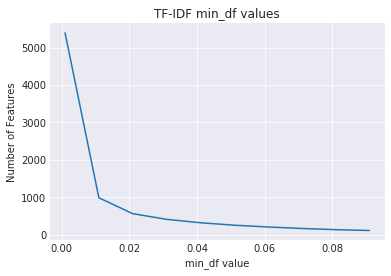

In [143]:
plot(min_df_range, count)
title("TF-IDF min_df values")
xlabel('min_df value')
ylabel('Number of Features');

In [14]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"', '\\',
         '02', '03', '04', '05', '06', '07',
         '08', '09', '0801', '00', '000', '01',
        '10', '100', '100k', '102', '1020', '105', '106',
        '109', '10th', '11', '110', '112', '113', '118', '11th',
        '12', '120', '129', '12th', '13', '135', '13th', '14', 'Verse',
        'Arrangement', 'Chorus', 'Spoken', 'Outro', 'Intro', 
         '_davy', 'instrumental', 'num']
stop = set(stop)
tf = TfidfVectorizer(stop_words=stop, #ngram_range=(1, 2),
                    token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=.011)
doc_vectors = tf.fit_transform(lemmed_lyrics)

In [15]:
doc_vectors_back = doc_vectors.toarray()

In [2]:
# TF-IDF Dataframe after some tuning with min_df, n-grams, tokenization
# pd.DataFrame(doc_vectors_back, columns=tf.get_feature_names())

# NMF

In [149]:
n_topics = 10
nmf = NMF(n_components=n_topics, random_state=1234, alpha=.1, l1_ratio=0.5, init='nndsvd').fit(doc_vectors)

In [150]:
# from http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

        

In [151]:
print_top_words(nmf, tf.get_feature_names(), 10)

Topic #0: know never time one say heart away life could day
Topic #1: love heart true girl need got sweet know give always
Topic #2: oh whoa night uh girl ah woah take tonight yes
Topic #3: baby come wanna good hey tonight lovin girl need sweet
Topic #4: la da na hey yo ay like new tonight push
Topic #5: get like got wanna girl ya hey man gonna cause
Topic #6: ooh ah woah doo get whoa woo take hey babe
Topic #7: let go come dance please take tonight hold back rock
Topic #8: yeah hey come good uh ah know really huh got
Topic #9: want need know wanna tell really give hold make touch


In [152]:
# now let's transform our documents to topic-space
print(f"shape before transforming to topic space: {doc_vectors.shape}")

doc_topics = nmf.transform(doc_vectors)

print(f"shape after transforming to topic space: {doc_topics.shape}")

shape before transforming to topic space: (5750, 987)
shape after transforming to topic space: (5750, 10)


In [153]:
df_cleaned_copy.Decade.value_counts().sort_index()

[1950, 1960)    469
[1960, 1970)    902
[1970, 1980)    949
[1980, 1990)    974
[1990, 2000)    951
[2000, 2010)    941
[2010, 2016)    564
Name: Decade, dtype: int64

# Topic Modeling by Decade 

In [160]:
df_cleaned_copy['Decade'] = df_cleaned_copy.Decade.astype('str')

In [164]:
df_cleaned_copy.Decade[0]

'[1950, 1960)'

In [165]:
fiftys = df_cleaned_copy[df_cleaned_copy.Decade == '[1950, 1960)']

In [205]:
fiftys_lyrics = fiftys.Lyrics.values

In [206]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"', '\\',
         '02', '03', '04', '05', '06', '07',
         '08', '09', '0801', '00', '000', '01',
        '10', '100', '100k', '102', '1020', '105', '106',     '109', '10th', '11', '110', '112', '113', '118', '11th',
        '12', '120', '129', '12th', '13', '135', '13th', '14', 'Verse',
        'Arrangement', 'Chorus', 'Spoken', 'Outro', 'Intro', 
         '_davy', 'instrumental', 'num']
stop = set(stop)
tf = TfidfVectorizer(stop_words=stop, #ngram_range=(1, 2),
                    token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=.011)
doc_vectors_50s = tf.fit_transform(fiftys_lyrics)
doc_vectors_back_50s = doc_vectors_50s.toarray()
pd.DataFrame(doc_vectors_back_50s, columns=tf.get_feature_names())

n_topics = 7
nmf = NMF(n_components=n_topics, random_state=1234, alpha=.1, l1_ratio=0.5, init='nndsvd').fit(doc_vectors_50s)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("Topics for the 1950s:\n")
print_top_words(nmf, tf.get_feature_names(), 10)        

Topics for the 1950s:

Topic #0: love know heart never true say like one mine come
Topic #1: yeah mm gonna got find feeling come uh right well
Topic #2: oh ah uh tell please stay little dark tonight mm
Topic #3: doo dee get ee come da ah goes cryin say
Topic #4: baby well bop doll ee ya want bye lovin fun
Topic #5: go let rock home roll come stroll tight wanna day
Topic #6: ooh wait cause crazy girl band left shoes wonder fall


In [191]:
sixtys = df_cleaned_copy[df_cleaned_copy.Decade == '[1960, 1970)'].reset_index().drop('index', axis=1)

In [196]:
sixtys_lyrics = sixtys.Lyrics.values

In [204]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"', '\\',
         '02', '03', '04', '05', '06', '07',
         '08', '09', '0801', '00', '000', '01',
        '10', '100', '100k', '102', '1020', '105', '106',     '109', '10th', '11', '110', '112', '113', '118', '11th',
        '12', '120', '129', '12th', '13', '135', '13th', '14', 'Verse',
        'Arrangement', 'Chorus', 'Spoken', 'Outro', 'Intro', 
         '_davy', 'instrumental', 'num']
stop = set(stop)
tf = TfidfVectorizer(stop_words=stop, #ngram_range=(1, 2),
                    token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=.011)
doc_vectors_60s = tf.fit_transform(sixtys_lyrics)
doc_vectors_back_60s = doc_vectors_60s.toarray()
pd.DataFrame(doc_vectors_back_60s, columns=tf.get_feature_names())

n_topics = 7
nmf = NMF(n_components=n_topics, random_state=1234, alpha=.1, l1_ratio=0.5, init='nndsvd').fit(doc_vectors_60s)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("Topics for the 1960s:\n")
print_top_words(nmf, tf.get_feature_names(), 10)        

Topics for the 1960s:

Topic #0: love true know need always heart say never way tell
Topic #1: baby good oh ooh ya hey lovin need real wanna
Topic #2: little go girl know one get got time see never
Topic #3: la de tonight da mean closer friend cried choose lose
Topic #4: yeah oh ooh whoa got huh ah know really good
Topic #5: come twist show back like let ah tonight hey please
Topic #6: none young green gun guide guess grows grown grow ground


In [199]:
seventys = df_cleaned_copy[df_cleaned_copy.Decade == '[1970, 1980)']
#seventys

In [201]:
seventys_lyrics = seventys.Lyrics.values

In [203]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"', '\\',
         '02', '03', '04', '05', '06', '07',
         '08', '09', '0801', '00', '000', '01',
        '10', '100', '100k', '102', '1020', '105', '106',     '109', '10th', '11', '110', '112', '113', '118', '11th',
        '12', '120', '129', '12th', '13', '135', '13th', '14', 'Verse',
        'Arrangement', 'Chorus', 'Spoken', 'Outro', 'Intro', 
         '_davy', 'instrumental', 'num']
stop = set(stop)
tf = TfidfVectorizer(stop_words=stop, #ngram_range=(1, 2),
                    token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=.011)
doc_vectors_70s = tf.fit_transform(seventys_lyrics)
doc_vectors_back_70s = doc_vectors_70s.toarray()
pd.DataFrame(doc_vectors_back_70s, columns=tf.get_feature_names())

n_topics = 7
nmf = NMF(n_components=n_topics, random_state=1234, alpha=.1, l1_ratio=0.5, init='nndsvd').fit(doc_vectors_70s)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("Topics for the 1970s:\n")
print_top_words(nmf, tf.get_feature_names(), 10)        

Topics for the 1970s:

Topic #0: know got time go like come let way gonna one
Topic #1: la da friends hot line hey new someday children brand
Topic #2: love want ya fall feel like need sweet heart never
Topic #3: baby come get let dance hey worry give want hold
Topic #4: boogie get dance dancing disco got ah want uh man
Topic #5: oh yeah sweet girl whoa best disco ah nobody want
Topic #6: ooh hey get yeah heaven ride hoo doctor goodbye say
